# Matplotlib - Tutorial

- Matplotlib é a biblioteca mais importante na geração de gráficos em python.
- Outras bibliotecas que geram gráficos, em geral, comunicam-se com Matplotlib, sendo de extrema importância seu conhecimento profundo.
- O objetivo desse tutorial é explanar sobre as principais funções do Matplotlib e principalmente entender a arbodagem orientada à objeto. 
- A documentação principal da biblioteca segue no link:
https://matplotlib.org/
- Outra documentação usada para montar o tutorial
https://realpython.com/python-matplotlib-guide/

In [1]:
# Para iniciar os estudos iremos importar as bibliotecas que usaremos.
import pandas as pd
import numpy as np
# Por padrão importamos matplotlib.pyplot (classe do matplotlib) pelo alias 'plt'
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Com numpy iremos criar dois arrays. 
x = np.linspace(0, 5, 11)
y = x**2

### plt.plot
- O plt.plot() é o mais tradicional dos plots, recebe no mínimo dois parâmetros 'x' e 'y'. 
- Podemos inserir diversos parâmetros de modo a formatar o gráfico, como: cor, forma dos pontos, espessura da linha entre outros.
- O Matplotlib permite que seus eixos sejam configurados, assim como outras estruturas do gráfico.
- Podemos também definir o estilo, grid entre outros. Que serão vistos ao longo do notebook. Vamos iniciar pelos itens mais simples

Text(0, 0.5, 'Eixo y')

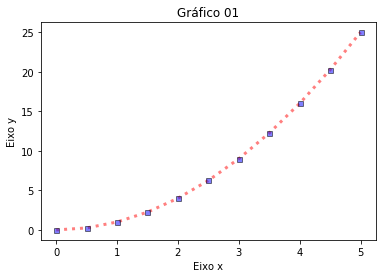

In [3]:
# Primeiro plot.
# Tendo importado a biblioteca o método mais simples é criar o plot(x, y)

# Alguns parâmetros:
# alpha = Nível de transparência - usa-se valores abaixo de 1. Sendo quanto menor mais transparente
# marker = Formato dos pontos. Recebe uma string, alguns testes ('.','o','*','h','v','<','s')
# linestyle = Formato da linha. Recebe uma string, alguns testes (':','-','--','-.')
plt.plot(x, y, color = 'red', alpha = 0.5, marker = 's', markeredgecolor = 'black', markersize = 5,  
         markerfacecolor = 'blue', linestyle = ':', linewidth = 3)
# Queremos um plot de x e y, com a linha entre os pontos de cor vermelha, espessura 3 e estilo pontilhado
# Os pontos serão quadrados (square) com vertíces de cor preta, tamanho 5 e cor da face azul.
# Vimos atributos de transparência, controle de ponto, linha e coloração
# Vamos agora aos títulos e eixos
plt.title("Gráfico 01")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y") # O ponto e vírgula é apenas para deixar a saída livre. 

### Tratamento de Objeto - A hierarquia do objeto
- Figure - É o objeto mais externo, onde estão inseridos os objetos Axes
- Axes - É um gráfico propriamente dito. Nele será executado os pontos e estilo do gráfico.
- Abaixo dos Axes estão contidos objetos de hierarquia menor, como: linhas, legendas, eixos e assim por diante. Quase todo "elemento" de um gráfico pode ser visto como seu objeto manipulável.
- O objetos são criado com o comando plt.subplots().
- Primeiro veremos uma forma mais simples, para depois na orientação a objeto propriamente dita

### O Funcionamento do pyplot
- Quando executamos um comando do pyplot para criar um gráfico, o mesmo é adicionado ao Axes atual, não existindo, o mesmo é criado de forma padrão. 
- Como foi feito no exemplo acima, nada foi dito sobre a Figure ou sobre o Axes, caso seja definido um subplot antes, os elementos serão adicionados a esse subplot. Esse seria um tipo de tratamento direto do pyplot. 
- O pyplot tem duas abordagens principais, o tratamento direto, como foi feito acima ou o tratamento orientado à objeto que será como veremos a frente.
- A ideia de orientação a objeto é que temos como criar mais de um Axes na figura, a partir do instanciamento dos mesmos.

![alt text](object_hie.jpeg)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A025A64A8>,
       dtype=object))

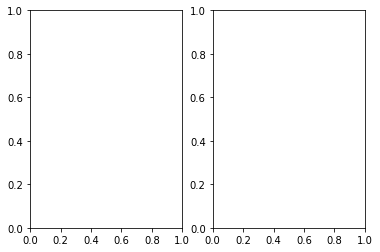

In [4]:
# Quando chamamos a função plt.subplots() passamos como parâmetros mínimos o número de linhas e colunas
plt.subplots(nrows=1, ncols=2)
# É gerado então um espaço em branco com eixos padrões
# Como pode ser observado, trata-se de um array de objetos, nada foi instanciado apenas gerado para ilustração

Text(0, 0.5, 'Eixo y')

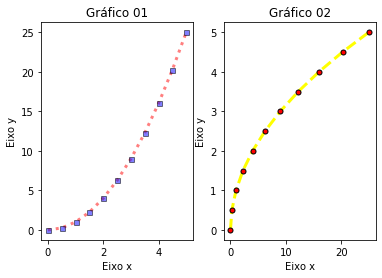

In [5]:
# Antes de entrarmos no aspecto de objetos vamos ver a forma mais simples
# Não confundir plt.subplots (orientação à objeto) e plt.subplot (abordagem direta)
plt.subplot(1, 2, 1) # Aqui foi dito que eu tenho 1 linha e 2 colunas. E estou trabalhando no índice 1
# Pelo tratamento direto, tudo que vier abaixo, até que seja chamado outro subplot, irá ser adicionado ao subplot de índice 1
plt.plot(x, y, color = 'red', alpha = 0.5, marker = 's', markeredgecolor = 'black', markersize = 5,  
         markerfacecolor = 'blue', linestyle = ':', linewidth = 3)
plt.title("Gráfico 01")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
# Terminado o primeiro plot, podemos chamar o Axe do indice 02
plt.subplot(1, 2, 2) # Aqui informa que o que virá pertence ao índice 2
plt.plot(y, x, color = 'yellow', alpha = 1, marker = 'o', markeredgecolor = 'black', markersize = 5,  
         markerfacecolor = 'red', linestyle = '--', linewidth = 3)
plt.title("Gráfico 02")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

- O método acima é simples e intuitivo, no entanto, quando queremos ter mais controle ele se torna ineficiente
- Como foi discutido acima, quando chamamos os métodos plot, title, etc. Eles irão referenciar uma figura definida.
- A forma mais comum é criar instâncias da classe matplotlib, como será visto abaixo
- Ou podemos usar o método subplots na criação de objetos. 

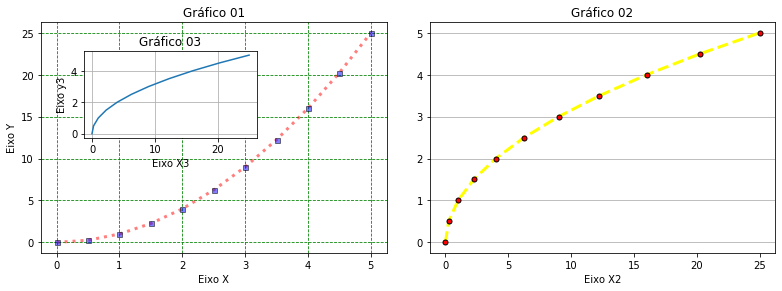

In [6]:
# Instânciamos primeiro um objeto fig.
fig = plt.figure()

# Depois, com fig, iremos criar os plots
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes recebe uma lista das posições
# axes funciona da seguinte forma. Imagine que temos dois pts de referência. O (0,0) e o (1,1)
# O primeiro diz o quanto (0,0) irá se afastar sentido X e o segundo sentido Y.
# O 3º e 4º funciona da mesma forma, mas pensando na referência (1,1) - quina superior direita.
axes.set_xlabel("Eixo X")
axes.set_ylabel("Eixo Y")
axes.set_title("Gráfico 01")
axes.plot(x, y, color = 'red', alpha = 0.5, marker = 's', markeredgecolor = 'black', markersize = 5,  
         markerfacecolor = 'blue', linestyle = ':', linewidth = 3)
# O Eixo dois criamos um gráfico igual o de cima, invertendo os dados de x e y. 
axes2 = fig.add_axes([1, 0.1, 0.8, 0.8]) # [x(0,0), y(0,0), x(1,1), y(1,1)]
axes2.set_title("Gráfico 02")
axes2.set_xlabel("Eixo X2")
axes2.plot(y, x, color = 'yellow', alpha = 1, marker = 'o', markeredgecolor = 'black', markersize = 5,  
         markerfacecolor = 'red', linestyle = '--', linewidth = 3)
# Para deixar mais interessante, vamos inserir um gráfico 02 no gráfico 01 em menor escala e chamar de gráfico 03
axes3 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
axes3.set_title("Gráfico 03")
axes3.set_xlabel("Eixo X3")
axes3.set_ylabel("Eixo y3")
axes3.plot(y, x)
axes3.grid() # Cria um grid. Grid recebe parâmetros como tipo de linha, cor, etc.

axes2.grid(axis='y')
axes.grid(c='green', ls='--')



- Como pode ser visto, quando instânciamos, cada axes vira um objeto, podendo ser adicionada informações ao longo do código, basta que seja chamado no axes que se deseja.
- A manipulação torna-se bem livre e intuitiva

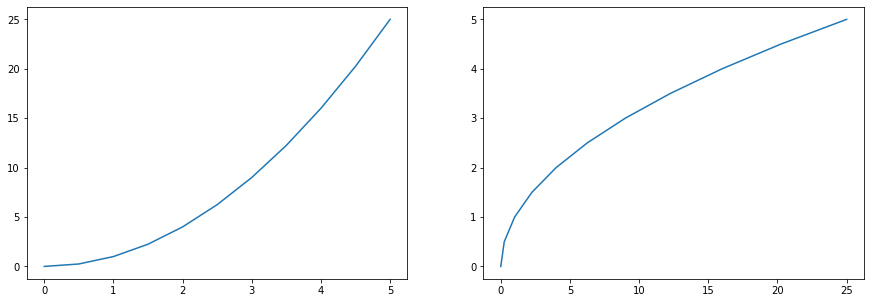

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# Em orientação à objeto devemos lembrar q cada figura criada e definida no seu eixo tem uma posição
ax[0].plot(x, y)
ax[1].plot(y, x)

### Para deixar o código um pouco mais interessante vamos abrir um DataFrame com informações de um ativo da bolsa

In [8]:
colunas = ['Ativo', 'Data', 'Abertura', 'Minimo', 'Maximo', 'Fechamento', 'Vol_Financeira', 'Vol_Neg']
# Função para abrir dados de um ativo
def dados_ativo_profit(ativo, nome):
    df_ativo = pd.read_csv(ativo, sep=';', header=None, names=colunas)
    df_ativo['Data'] = pd.to_datetime(df_ativo['Data'], format='%d/%m/%Y')
    for column in colunas:
        try:
            df_ativo[column] = df_ativo[column].str.replace(',','.')
            df_ativo[column] = pd.to_numeric(df_ativo[column], errors='coerce')
        except:
            None
    df_ativo['Ativo'] = nome
    df_ativo.sort_values('Data', inplace=True)
    df_ativo.reset_index(inplace=True, drop=True)
    return df_ativo
# Função para gerar uma média móvel
def mms(arr, n = 12):
    """Média Móvel Simples. Recebe um array e um valor de n períodos
    Retorna outro array, com a média móvel simples para os n-períodos
    """
    new_arr = pd.DataFrame(arr).rolling(window=n).mean().values
    return new_arr
def retorna_volume(arr_01, arr_02, arr_vol):
    new_arr = np.zeros(len(arr_01))
    for i in range(len(arr_01)):
        if (arr_01[i] > arr_02[i]):
            new_arr[i] = arr_vol[i]
    return new_arr

In [9]:
ativo = dados_ativo_profit('https://raw.githubusercontent.com/Lessalc/Long-Short/main/BBSE3_B_0_Di%C3%A1rio.csv', 'BBSE3')

In [10]:
ativo['MM_9'] = mms(ativo['Fechamento'].values, 9)
ativo['MM_21'] = mms(ativo['Fechamento'].values, 21)
ativo['MM_50'] = mms(ativo['Fechamento'].values, 50)
ativo['Vol_Neg_Pos'] = retorna_volume(ativo['Fechamento'].values, ativo['Abertura'].values, ativo['Vol_Neg'].values)
ativo['Vol_Neg_Neg'] = ativo['Vol_Neg'].values - ativo['Vol_Neg_Pos'].values
ativo['Vol_Neg_Medio_12'] = mms(ativo['Vol_Neg'].values, 12)
ativo['Vol_Financeira_Pos'] = retorna_volume(ativo['Fechamento'].values, ativo['Abertura'].values, ativo['Vol_Financeira'].values)
ativo['Vol_Financeira_Neg'] = ativo['Vol_Financeira'].values - ativo['Vol_Financeira_Pos'].values
ativo['Vol_Financeira_Medio_12'] = mms(ativo['Vol_Financeira'].values, 12)
ativo = ativo.iloc[-100:,:] # Vamos pegar as 100 últimas linhas, visando conseguir visualizar melhor
ativo.head()

,Ativo,Data,Abertura,Minimo,Maximo,Fechamento,Vol_Financeira,Vol_Neg,MM_9,MM_21,MM_50,Vol_Neg_Pos,Vol_Neg_Neg,Vol_Neg_Medio_12,Vol_Financeira_Pos,Vol_Financeira_Neg,Vol_Financeira_Medio_12
395,BBSE3,2020-07-16,26.61,26.86,26.47,26.57,57328209.0,2086900,26.892222,27.130476,25.5968,0.0,2086900.0,3.743417e+06,0.0,57328209.0,1.040410e+08
396,BBSE3,2020-07-17,26.59,26.94,26.59,26.72,341028278.0,12380200,26.841111,27.118095,25.6756,12380200.0,0.0,4.427958e+06,341028278.0,0.0,1.228356e+08
397,BBSE3,2020-07-20,26.77,27.71,26.64,27.45,151436584.0,5376800,26.895556,27.095714,25.7732,5376800.0,0.0,4.622292e+06,151436584.0,0.0,1.284386e+08
398,BBSE3,2020-07-21,27.75,28.04,27.14,27.36,127840132.0,4531000,26.882222,27.067143,25.8636,0.0,4531000.0,4.869800e+06,0.0,127840132.0,1.354735e+08
399,BBSE3,2020-07-22,27.41,27.75,27.18,27.47,91962284.0,3248200,26.912222,27.047619,25.9698,3248200.0,0.0,4.711317e+06,91962284.0,0.0,1.310932e+08


### Criando o objeto com subplots

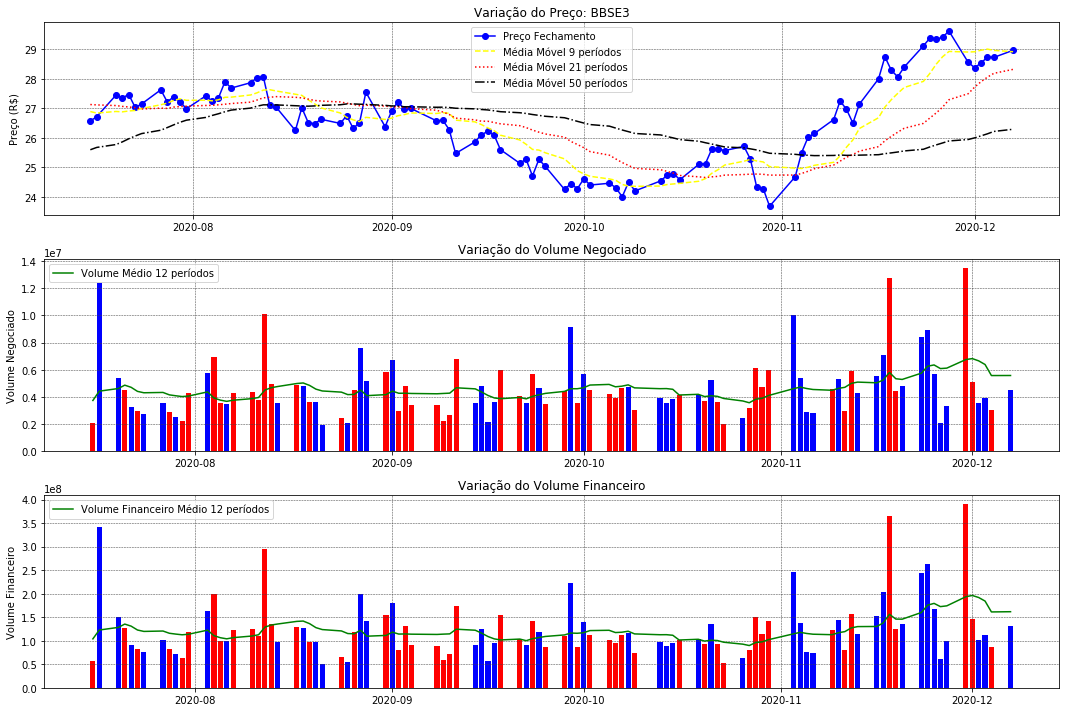

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(15,10)) # 3 linhas e 1 coluna 
# Criamos um objeto Figure, intanciando fig
# Nele dizemos que a dimensão é 15x10 e que será composto de 3 linhas e 1 coluna. Cada uma recebendo um objeto Axes

# Para o primeiro Axes usaremos o preço de fechamento e alguma(s) média(s)
ax[0].plot(ativo['Data'].values, ativo['Fechamento'].values, marker ='o', color='blue', label='Preço Fechamento')
ax[0].plot(ativo['Data'].values, ativo['MM_9'].values, color = 'yellow', ls='--', label='Média Móvel 9 períodos')
ax[0].plot(ativo['Data'].values, ativo['MM_21'].values, color = 'red', ls=':', label='Média Móvel 21 períodos')
ax[0].plot(ativo['Data'].values, ativo['MM_50'].values, color = 'black', ls='-.', label='Média Móvel 50 períodos')
# Até aqui acrescentamos as linhas que serão plotadas, hora de organizar o gráfico
ax[0].set_title('Variação do Preço: '+str(ativo['Ativo'][400])) # Definindo o título
ax[0].set_ylabel("Preço (R$)") # Definindo a legenda de Y
ax[0].legend(loc = 0) # Acrescentando a legenda das linhas, loc = 0 deixa a máquina escolher a melhor localização
ax[0].grid(linestyle="--", linewidth=0.5, color='.25') # Por fim vamos criar um grid para ajudar na visualização

# Agora vamos acrescentar o gráfico de Volume Negociado
ax[1].bar(ativo['Data'].values, ativo['Vol_Neg_Pos'].values, color='blue')
ax[1].bar(ativo['Data'].values, ativo['Vol_Neg_Neg'].values, color='red')
ax[1].plot(ativo['Data'].values, ativo['Vol_Neg_Medio_12'].values, color='green', label='Volume Médio 12 períodos')
ax[1].set_title('Variação do Volume Negociado')
ax[1].set_ylabel("Volume Negociado")
ax[1].legend(loc = 0)
ax[1].grid(linestyle="--", linewidth=0.5, color='.25')

# Agora vamos acrescentar o gráfico de Volume Financeiro
ax[2].bar(ativo['Data'].values, ativo['Vol_Financeira_Pos'].values, color='blue')
ax[2].bar(ativo['Data'].values, ativo['Vol_Financeira_Neg'].values, color='red')
ax[2].plot(ativo['Data'].values, ativo['Vol_Financeira_Medio_12'].values, color='green', label='Volume Financeiro Médio 12 períodos')
ax[2].set_title('Variação do Volume Financeiro')
ax[2].set_ylabel("Volume Financeiro")
ax[2].legend(loc = 0)
ax[2].grid(linestyle="--", linewidth=0.5, color='.25')

plt.tight_layout()

- O método acima trouxe uma boa visualização, mas e se quisermos tratar os Axes com tamanhos diferentes? Podemos então usar o istânciamento de uma figura e ir instanciando os Axes, com os tamanhos que queremos. Vejamos:

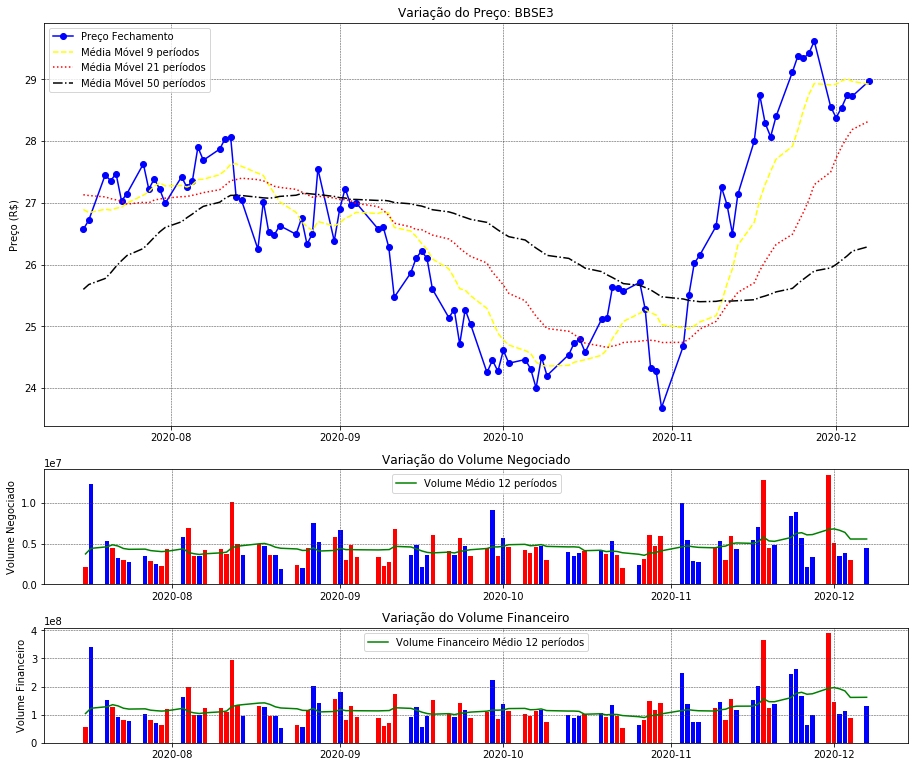

In [12]:
# Objeto Figure.
fig = plt.figure()

# Depois, com fig, iremos criar os plots
ax = fig.add_axes([0.1, 1.2, 2, 1.4])
ax2 = fig.add_axes([0.1, 0.65, 2, 0.4])
ax3 = fig.add_axes([0.1, 0.1, 2, 0.4])

# O resto do Código se Mantém, aqui só alteramos os Axes, adicionando a um objetivo do tipo Figure
ax.plot(ativo['Data'].values, ativo['Fechamento'].values, marker ='o', color='blue', label='Preço Fechamento')
ax.plot(ativo['Data'].values, ativo['MM_9'].values, color = 'yellow', ls='--', label='Média Móvel 9 períodos')
ax.plot(ativo['Data'].values, ativo['MM_21'].values, color = 'red', ls=':', label='Média Móvel 21 períodos')
ax.plot(ativo['Data'].values, ativo['MM_50'].values, color = 'black', ls='-.', label='Média Móvel 50 períodos')
ax.set_title('Variação do Preço: '+str(ativo['Ativo'][400])) # Definindo o título
ax.set_ylabel("Preço (R$)") # Definindo a legenda de Y
ax.legend(loc = 0) # Acrescentando a legenda das linhas, loc = 0 deixa a máquina escolher a melhor localização
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) # Por fim vamos criar um grid para ajudar na visualização


ax2.bar(ativo['Data'].values, ativo['Vol_Neg_Pos'].values, color='blue')
ax2.bar(ativo['Data'].values, ativo['Vol_Neg_Neg'].values, color='red')
ax2.plot(ativo['Data'].values, ativo['Vol_Neg_Medio_12'].values, color='green', label='Volume Médio 12 períodos')
ax2.set_title('Variação do Volume Negociado')
ax2.set_ylabel("Volume Negociado")
ax2.legend(loc = 0)
ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax3.bar(ativo['Data'].values, ativo['Vol_Financeira_Pos'].values, color='blue')
ax3.bar(ativo['Data'].values, ativo['Vol_Financeira_Neg'].values, color='red')
ax3.plot(ativo['Data'].values, ativo['Vol_Financeira_Medio_12'].values, color='green', label='Volume Financeiro Médio 12 períodos')
ax3.set_title('Variação do Volume Financeiro')
ax3.set_ylabel("Volume Financeiro")
ax3.legend(loc = 0)
ax3.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10);

### Outros tipos tradicionais de Gráficos
- Com os dados de um ativo, vamos cálcular os retornor intraday e os entre os dias, a fim de verificar sua frequência

In [13]:
ativo['Var_Diaria'] = ((ativo['Fechamento'] - ativo['Abertura'])/ativo['Abertura']) * 100
retorno = np.zeros(len(ativo.index))
fechamento = ativo['Fechamento'].values
for i in range(1, len(retorno)):
    retorno[i] = ((fechamento[i] - fechamento[i-1])/fechamento[i-1]) * 100
ativo['Retorno_Diario'] = retorno 

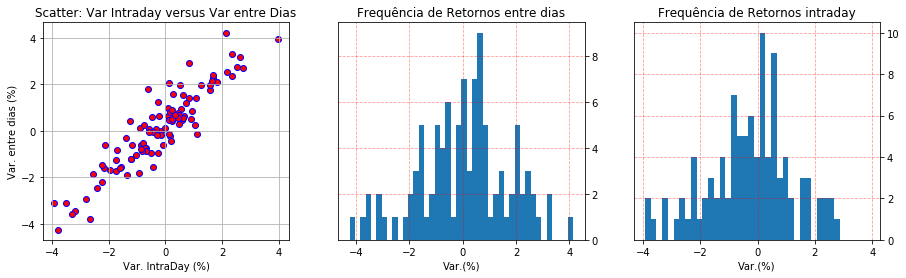

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax1.scatter(x=ativo['Var_Diaria'].values, y=ativo['Retorno_Diario'].values, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: Var Intraday versus Var entre Dias')
ax1.set_xlabel('Var. IntraDay (%)')
ax1.set_ylabel('Var. entre dias (%)')
ax1.grid()

ax2.hist(retorno, bins=np.arange(retorno.min(), retorno.max(), 0.2))
ax2.set_title('Frequência de Retornos entre dias')
ax2.set_xlabel('Var.(%)')
ax2.yaxis.tick_right()
ax2.grid(c='r', ls='--', alpha=0.4)

ax3.hist(ativo['Var_Diaria'].values, bins=np.arange(ativo['Var_Diaria'].values.min(), ativo['Var_Diaria'].values.max(), 0.2))
ax3.set_title('Frequência de Retornos intraday')
ax3.set_xlabel('Var.(%)')
ax3.yaxis.tick_right()
ax3.grid(c='r', ls='--', alpha=0.4)

- Usando o histograma vamos controlar melhor os intervalos
- Duas classes são importantes: Locator e Formatter
- Temos os Major ticks e os Minor ticks. Por padrão os Minors não são colocados, devendo ser ativados
- MultipleLocator - Adiciona ticks em múltiplos de alguma base
- FormartStrFormatter - Usada para formartar o tick labels

In [15]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

(0, 10)

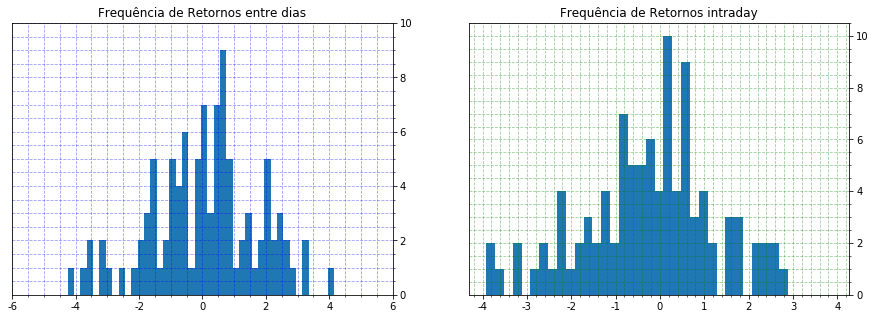

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Iremos Repetir o gráfico de frequência acima.
ax1.hist(retorno, bins=np.arange(retorno.min(), retorno.max(), 0.2))
ax1.set_title('Frequência de Retornos entre dias')
ax1.yaxis.tick_right()

ax2.hist(ativo['Var_Diaria'].values, bins=np.arange(ativo['Var_Diaria'].values.min(), ativo['Var_Diaria'].values.max(), 0.2))
ax2.set_title('Frequência de Retornos intraday')
ax2.yaxis.tick_right()

# Agora vamos acrescentar os ticks
# Axes 01 - Eixo X
ax1.xaxis.set_major_locator(MultipleLocator(2)) # Basicamente digo que o Major é de 2 em 2 espaços
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d')) # Formato da minha string
ax1.xaxis.set_minor_locator(MultipleLocator(0.5)) # Minors de 0.5 em 0.5
ax1.xaxis.set_minor_locator(AutoMinorLocator())
# Axes 01 - Eixo Y
ax1.yaxis.set_major_locator(MultipleLocator(2)) 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d')) 
ax1.yaxis.set_minor_locator(MultipleLocator(0.5)) 
ax1.yaxis.set_minor_locator(AutoMinorLocator())
# Axes 01 - Eixo X
ax2.xaxis.set_major_locator(MultipleLocator(1)) 
ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.xaxis.set_minor_locator(AutoMinorLocator())
# Axes 02 - Eixo Y
ax2.yaxis.set_major_locator(MultipleLocator(2)) 
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d')) 
ax2.yaxis.set_minor_locator(MultipleLocator(0.5)) 
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# O grid por padrão é adicionado aos Major, vamos adicionar os Minors tbm

ax1.grid(c='b', ls='--', alpha=0.4, which='both')
ax2.grid(c='g', ls='--', alpha=0.4, which='both')

# Ainda não haviamos criado limites nos eixos. Vejamos um dos dois com limite
ax1.set_xlim(-6, 6)
ax1.set_ylim(0, 10)


- O exemplo a seguir é retirado do tutorial

In [17]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [18]:
y = housing[:, -1] # Valor médio da área
pop, age = housing[:, [4, 7]].T # Densidade populacional da área e média da idade das casas

In [19]:
# Função para alinhar um texto dentro de um Axes
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

- Em Matplotlib temos um módulo "gridspec" que permite diversas customizações do subplot.
- Quando vimos acima o gráfico do fechamento de preço e volumes de negociação e financeiro. A fim de controlar os tamanhos dos Axes tivemos que usar o intanciamento da figura e adicionar os Axes com as dimensões.
- O gridspec permite criar um subplot e unificar alguns dos Axes, a fim de criar tamanhos diferentes

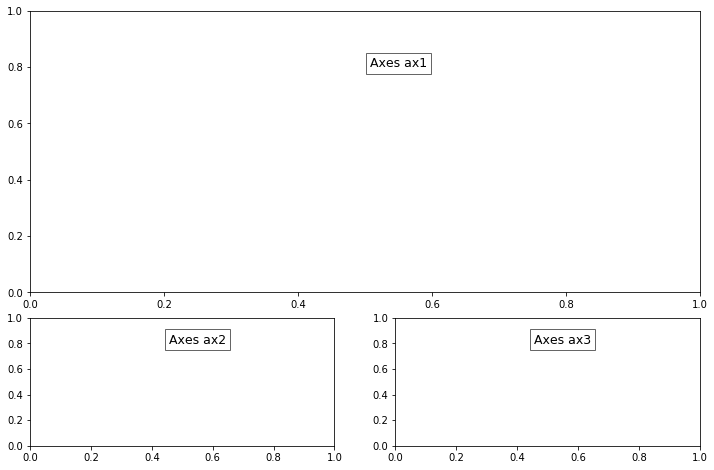

In [20]:
# Gridsize de 3 linhas e 2 colunas
gridsize = (3, 2)
# Instancianado a figura e definindo as dimensões gerais. A 12x8 será dividida em um grid de 3x2
fig = plt.figure(figsize=(12, 8))
# Definindo o ax1, chamando o gridsize posição 0,0 e com comprimento de 2 colunas e altura de 2 linhas
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
# Definindo o ax2 na posição 2,0
ax2 = plt.subplot2grid(gridsize, (2, 0))
# Definindo o ax2 na posição 2,1
ax3 = plt.subplot2grid(gridsize, (2, 1))
# Testando a função de adicionar texto
add_titlebox(ax1, "Axes ax1")
add_titlebox(ax2, "Axes ax2")
add_titlebox(ax3, "Axes ax3")

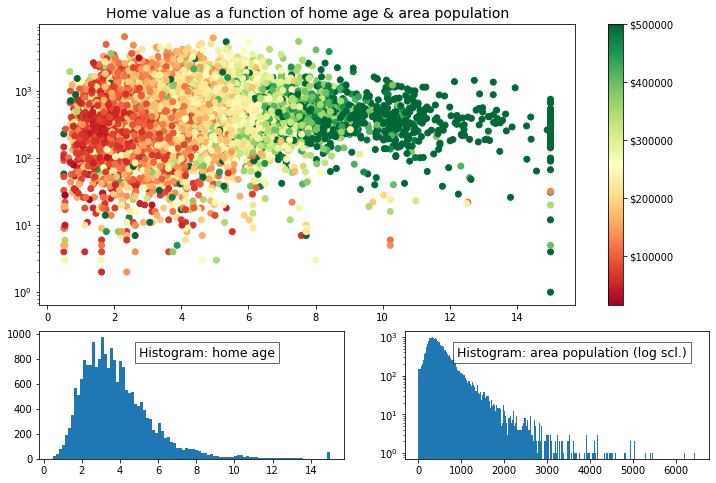

In [21]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
# Primeiro o título do Ax1
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
# Aqui criamos um scatter plot no Axes ax1. x = age, y = pop e cor de acordo com o valor médio. 
# cmap representa um mapeamento de cores. Quando a variável é contínua
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
# Para funcionar como legenda acrescentamos uma barra de cor no Axes ax1
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
# Os outros dois axes serão preenchidos com um histograma de pop e de age
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

## Por fim veremos um exemplo retirado do tutorial Matplotlib
- Quase tudo relacionado ao matplot, foi visto ao longo desse tutorial.
- O exemplo abaixo mostra como tudo pode ser entendido como objeto e modificado ou inserido

https://matplotlib.org/examples/showcase/anatomy.html

In [22]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

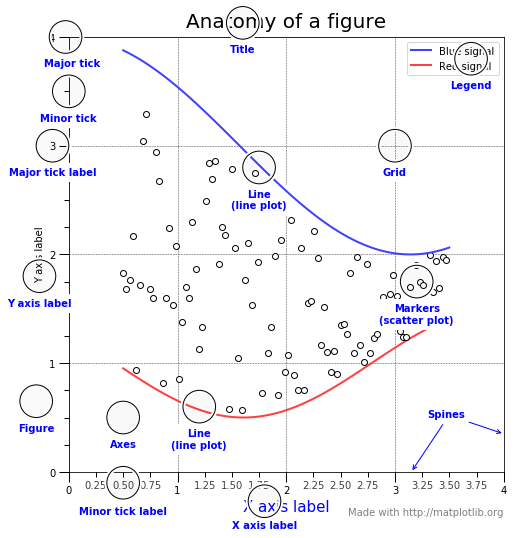

In [23]:
np.random.seed(19680801)
# Gerando os dados
X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

# Criando o objeto figure
fig = plt.figure(figsize=(8, 8))
# Acrescentando um Axes
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

# Definindo os majors e minors
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # Define que teremos 4 divisões. logo, 3 minors ticks.
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# Chamando a função acima para definir a formatação.
# Estamos dizendo que em x, queremos gormatar o valor do minor com 2 casas 
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

# Definindo limites
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Definindo comprimento e espessura dos ticks
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

# Criando um grid
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# Plotando os dados
ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k')

# Definindo as legendas dos Eixos e Título 
ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label", fontsize = 15, color = 'blue')
ax.set_ylabel("Y axis label")

ax.legend()

# Função para criar um círculo na Figure
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

# Função para inserir um texto nas posições determinadas 
def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Cada par com dois comandos abaixo irá gerar um círculo e um texto, conforme definido nas funções acima.
# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")


# Por fim acrescentando setas com indicativos.
color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()
